In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
PATH_TO_FILE: str = 'csvfiles/employee.csv' # Загрузка набора данных

df: pd.DataFrame = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame    

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,is_satisfying_last_evalutaion
0,0.38,0.53,2,157,3,0,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,0,support,low,1,0
14996,0.37,0.53,2,143,3,0,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,0,support,low,1,1


In [4]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [42]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=6, replace=True), 'satisfaction_level'] = np.nan

In [51]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропуски есть

satisfaction_level       6
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [48]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [50]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.satisfaction_level = df_median.satisfaction_level.fillna(df_median.satisfaction_level.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [59]:

# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.satisfaction_level = df_mean.satisfaction_level.fillna(df_median.satisfaction_level.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


⏰ В моем датасете была выбрана целевая переменная exceeds_monthly_hours_threshold -> которая была преобразована из average_montly_hours (если кол-во часов >= 160, то считается, что работник перерабатывал, иначе не перерабатывал)

In [93]:
df["exceeds_monthly_hours_threshold"] = np.where(df["average_montly_hours"] >= 160, 1, 0).astype(int)

In [94]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left',
       'exceeds_monthly_hours_threshold'],
      dtype='object')

In [95]:
Y = df['exceeds_monthly_hours_threshold'] # выбираем целевую переменную (категориальную)
X = df.drop('exceeds_monthly_hours_threshold', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('average_montly_hours', axis=1)

In [97]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,3,0,0,1
1,0.80,0.86,5,6,0,0,1
2,0.11,0.88,7,4,0,0,1
3,0.72,0.87,5,5,0,0,1
4,0.37,0.52,2,3,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,0,1
14995,0.37,0.48,2,3,0,0,1
14996,0.37,0.53,2,3,0,0,1
14997,0.11,0.96,6,4,0,0,1


In [99]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,exceeds_monthly_hours_threshold
0,0.38,0.53,2,157,3,0,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,0,support,low,1,1
14996,0.37,0.53,2,143,3,0,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,0,support,low,1,1


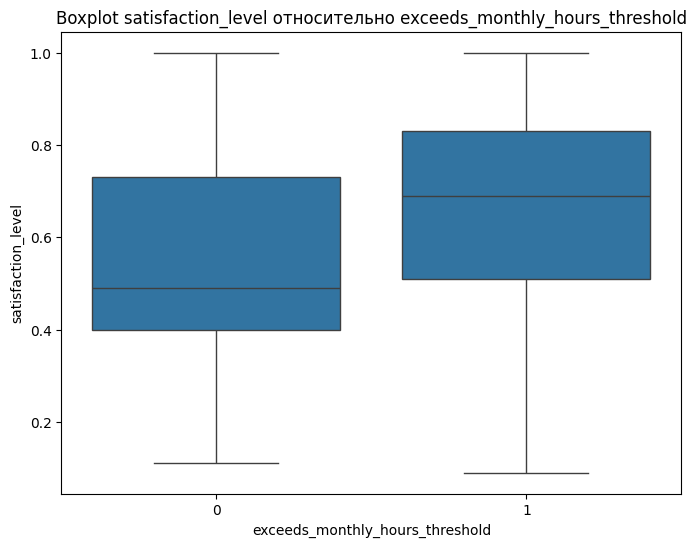

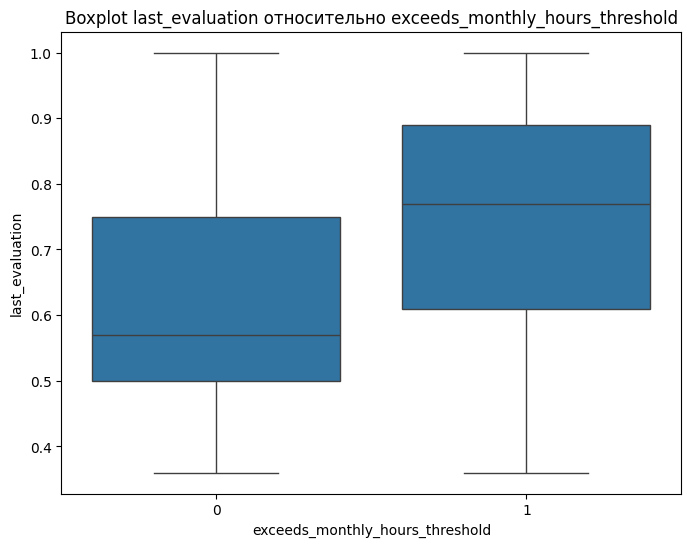

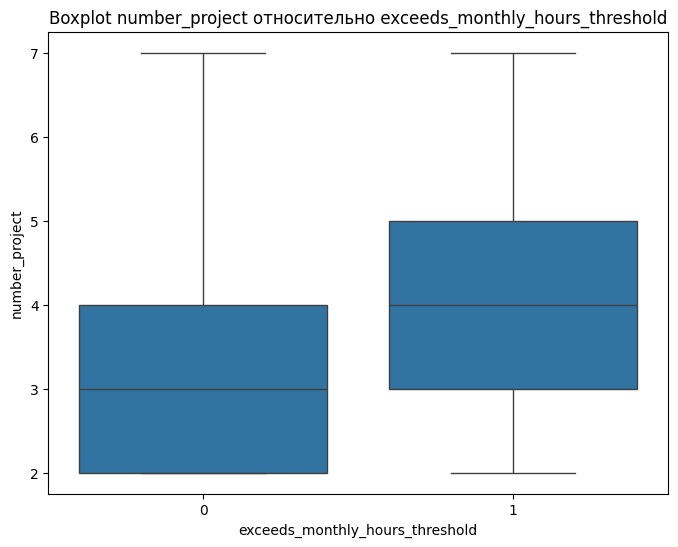

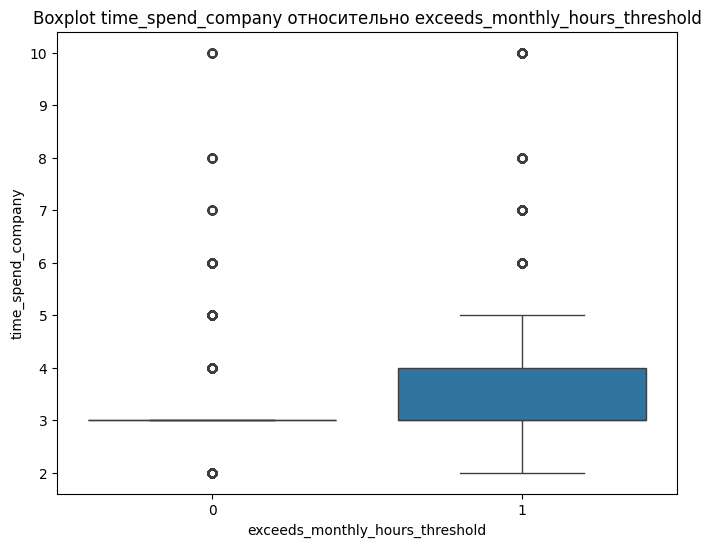

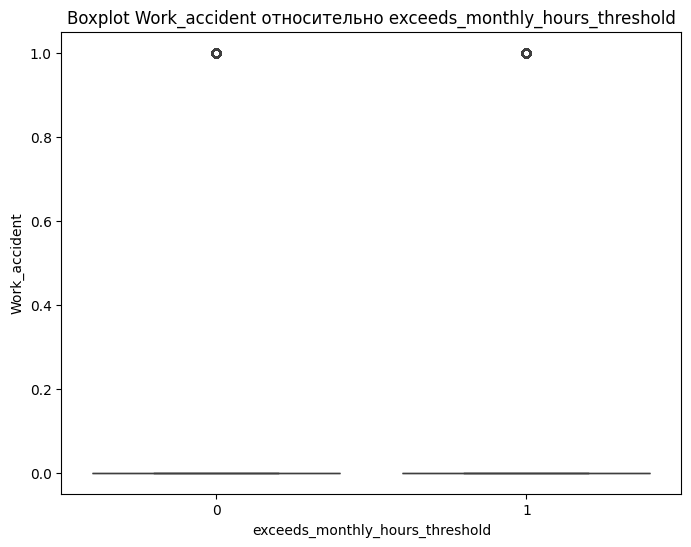

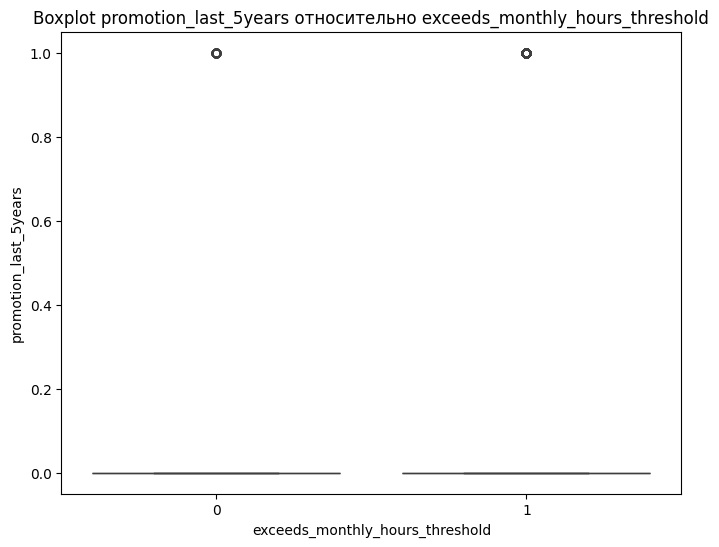

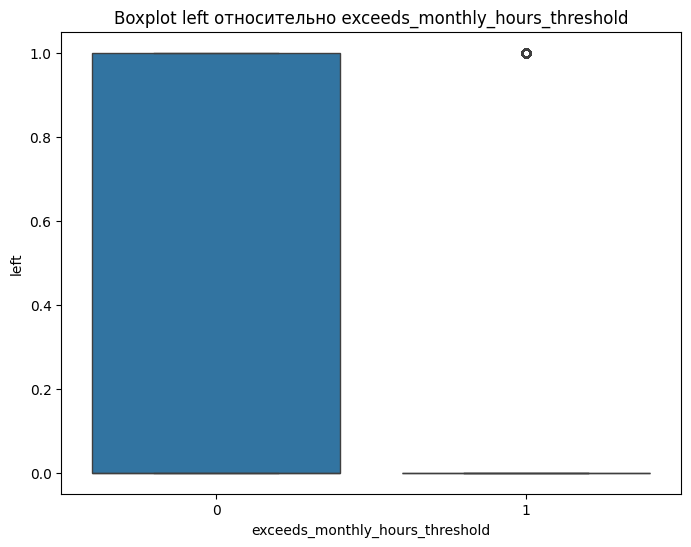

In [100]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='exceeds_monthly_hours_threshold', y=col, data=df)
    plt.title(f'Boxplot {col} относительно exceeds_monthly_hours_threshold')
    plt.show()

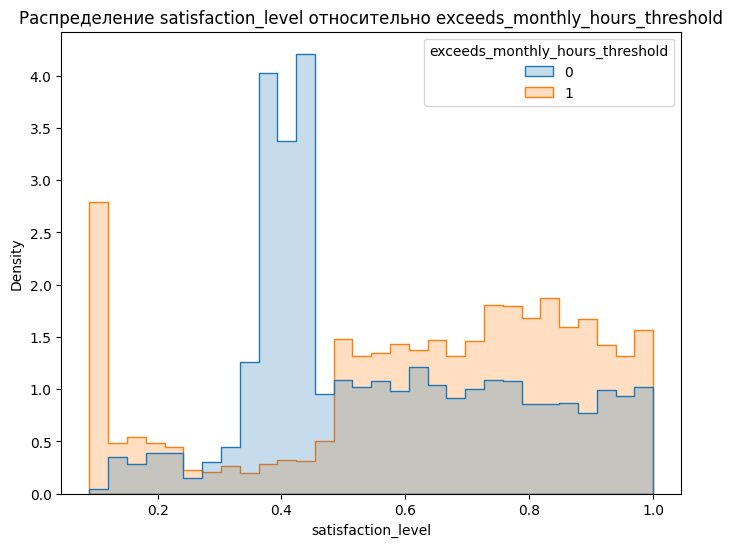

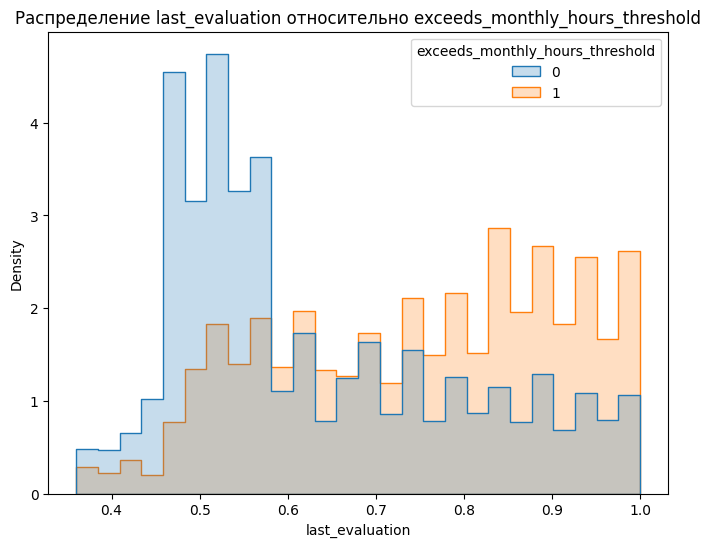

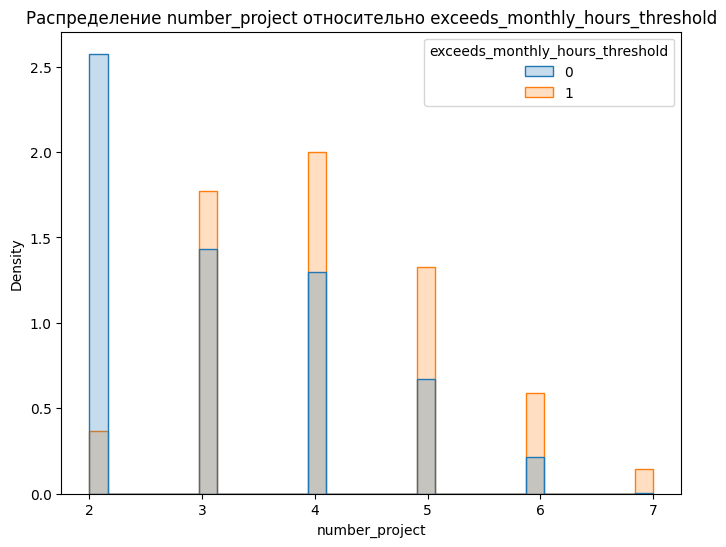

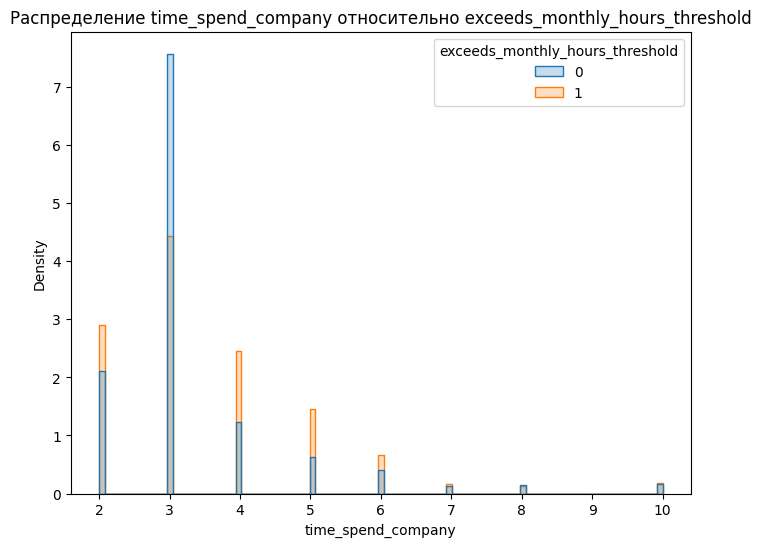

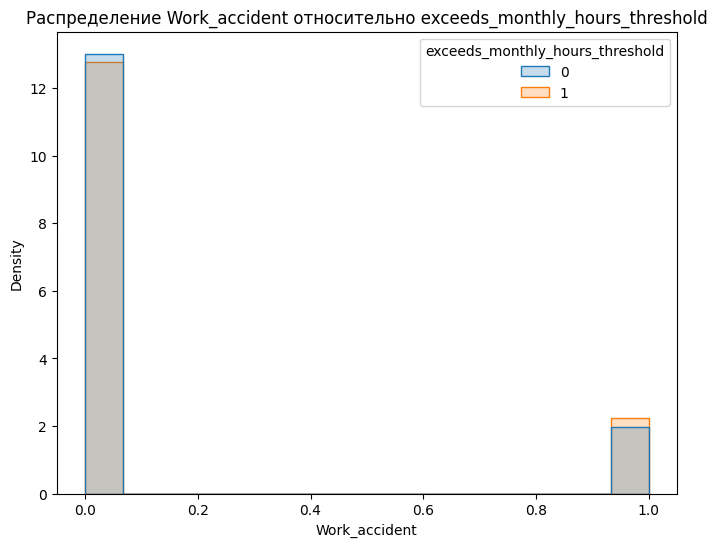

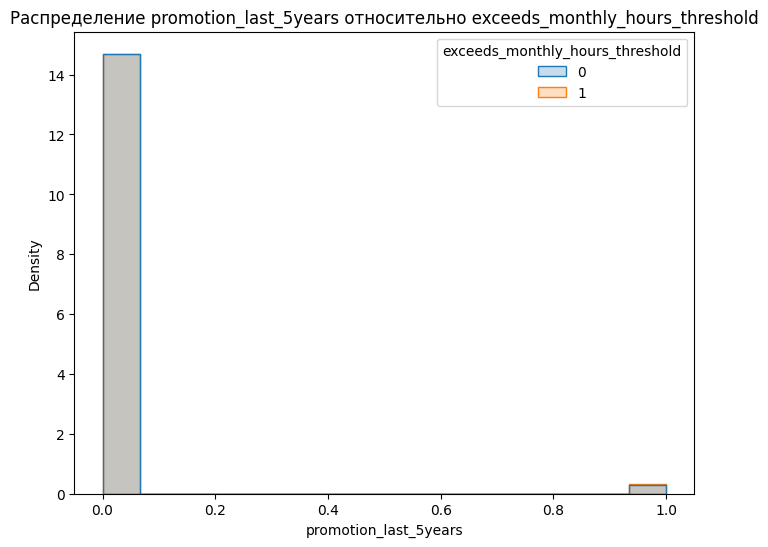

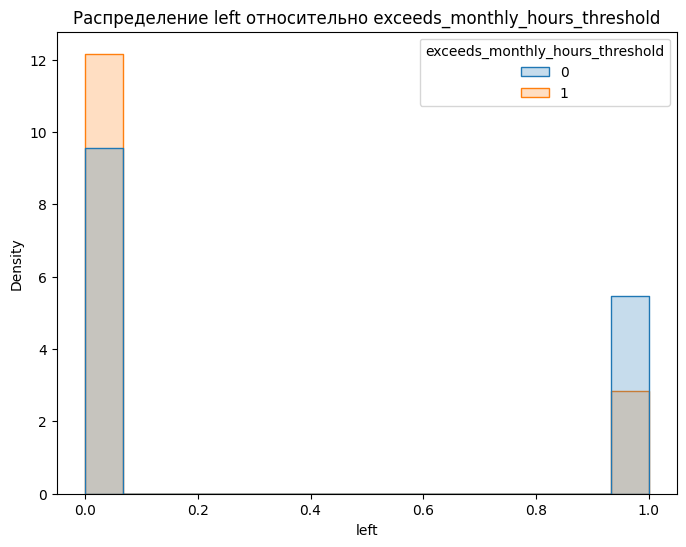

In [101]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='exceeds_monthly_hours_threshold', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно exceeds_monthly_hours_threshold')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [102]:
desc_stats_numeric = df.groupby('exceeds_monthly_hours_threshold')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('exceeds_monthly_hours_threshold')[df.select_dtypes(include=['object']).columns].describe()


Описание полученных результатов

⏰ Необходимо сделать подобное описание для своих переменных


In [107]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('exceeds_monthly_hours_threshold')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для satisfaction_level:

                                   count      mean       std   min   25%  \
exceeds_monthly_hours_threshold                                            
0                                 4204.0  0.560495  0.210853  0.11  0.40   
1                                10795.0  0.633216  0.259036  0.09  0.51   

                                  50%   75%  max  
exceeds_monthly_hours_threshold                   
0                                0.49  0.73  1.0  
1                                0.69  0.83  1.0  


Описательная статистика для last_evaluation:

                                   count      mean       std   min   25%  \
exceeds_monthly_hours_threshold                                            
0                                 4204.0  0.630176  0.162447  0.36  0.50   
1                                10795.0  0.749565  0.162601  0.36  0.61   

                                  50%   75%  max  
exceeds_monthly_hours_threshold       

In [108]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary         \
                                     count unique    top  freq  count unique   
exceeds_monthly_hours_threshold                                                
0                                     4204     10  sales  1180   4204      3   
1                                    10795     10  sales  2960  10795      3   

                                            
                                 top  freq  
exceeds_monthly_hours_threshold             
0                                low  2132  
1                                low  5184

⏰ Необходимо сделать подобное описание для своих переменных

Satisfaction Level:
    Среднее значение уровня удовлетворенности выше для тех, кто превышает порог месячных часов (0.63 против 0.56). Это может свидетельствовать о том, что сотрудники, которые работают больше, в среднем, более удовлетворены.
    У тех, кто не превышает порог, медиана удовлетворенности ниже (0.49 против 0.69), что подтверждает возможную связь между количеством работы и удовлетворенностью.

Last Evaluation:
    Средняя оценка сотрудников выше у тех, кто работает больше (0.75 против 0.63). Это указывает на то, что больше рабочих часов может положительно сказываться на оценке работы.
    Медиана оценки для этой группы также выше (0.77 против 0.57).

Number of Projects:
    Те, кто превышает порог рабочих часов, в среднем выполняют больше проектов (4.06 против 3.12), что логично, учитывая большее количество рабочих часов.
    Медиана числа проектов также выше у этой группы (5 против 4).

Time Spent in Company:
    Сотрудники, превышающие порог рабочих часов, в среднем, работают в компании дольше (3.57 года против 3.32 года). Это может свидетельствовать о том, что сотрудники с большим количеством рабочих часов имеют более долгую стажировку в компании.
    Медиана времени, проведенного в компании, выше для тех, кто работает больше (4 года против 3 лет).

Work Accident:
    Процент сотрудников с несчастными случаями на работе немного выше среди тех, кто превышает порог рабочих часов (0.15 против 0.13). Это может свидетельствовать о повышенном риске несчастных случаев при большем количестве рабочих часов.

Promotion in the Last 5 Years:
    Частота получения повышения среди сотрудников незначительно выше для тех, кто превышает порог рабочих часов (0.022 против 0.020). Однако разница небольшая, что может говорить о слабой корреляции между количеством рабочих часов и продвижением.

Left (Сотрудники, покинувшие компанию):
    Процент сотрудников, покинувших компанию, значительно выше среди тех, кто не превышает порог месячных часов (36.3% против 18.9%). Это может свидетельствовать о том, что сотрудники с меньшим количеством рабочих часов более склонны к увольнению.

Department and Salary:
    Большинство сотрудников в обеих группах работают в отделе продаж, но среди тех, кто работает больше, большая доля получает низкую зарплату (5184 против 2132), что может указывать на связь между зарплатой и количеством рабочих часов.

Общие выводы:

    Сотрудники, работающие больше, в среднем, получают более высокие оценки, выполняют больше проектов и остаются в компании дольше.
    Однако они также более подвержены несчастным случаям на работе, хотя и имеют немного больший шанс на получение повышения.
    Сотрудники с меньшим количеством рабочих часов чаще покидают компанию.

     

2. Расчет теста Пирсона
Описание:

Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.
Шаги:

    Рассчитайте коэффициенты корреляции Пирсона для каждого признака:

     


In [109]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,exceeds_monthly_hours_threshold
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,0.131372
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.313280
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.346857
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.758037
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.073868
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.022344
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,0.005567
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.183710
exceeds_monthly_hours_threshold,0.131372,0.313280,0.346857,0.758037,0.073868,0.022344,0.005567,-0.183710,1.000000


⏰ Интерпретируйте результаты

    satisfaction_level и left (-0.388)
        Умеренная отрицательная корреляция. Это указывает на то, что чем выше уровень удовлетворенности сотрудника, тем меньше вероятность его ухода из компании. Низкий уровень удовлетворенности связан с более высокой вероятностью увольнения.

    number_project и average_monthly_hours (0.417)
        Положительная корреляция средней силы. Чем больше у сотрудника проектов, тем больше его среднее количество отработанных часов в месяц. Это логично, так как большее количество проектов требует больше времени.

    number_project и last_evaluation (0.349)
        Умеренная положительная корреляция. Сотрудники, выполняющие больше проектов, обычно получают более высокие оценки на последних аттестациях.

    average_monthly_hours и last_evaluation (0.340)
        Положительная корреляция средней силы. Сотрудники, которые работают больше часов, обычно имеют более высокие оценки на аттестациях.

    left и satisfaction_level (-0.388)
        Сильная отрицательная корреляция. Это подтверждает предположение, что сотрудники с низким уровнем удовлетворенности чаще покидают компанию.

    exceeds_monthly_hours_threshold и average_monthly_hours (0.758)
        Сильная положительная корреляция. Сотрудники, которые превышают установленный порог по месячным часам работы, обычно работают значительно больше в среднем по месяцам. Это логично, поскольку данный признак отражает факт превышения нормы по отработанным часам.

    time_spend_company и left (0.145)
        Небольшая положительная корреляция. Сотрудники, которые работают в компании дольше, немного чаще уходят, возможно, из-за усталости или поиска новых возможностей.

Общий вывод: признаки, связанные с удовлетворенностью, временем, проведенным в компании, и количеством отработанных часов, влияют на вероятность ухода сотрудников, что важно учитывать при анализе текучести кадров.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [111]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']


In [112]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) 

In [113]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.38,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.11,0.88,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.72,0.87,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.37,0.52,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [114]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation']


In [115]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [116]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [117]:

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [118]:
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8027
Точность на тестовой выборке: 0.8033

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       841
           1       0.80      0.96      0.88      2159

    accuracy                           0.80      3000
   macro avg       0.80      0.68      0.70      3000
weighted avg       0.80      0.80      0.78      3000



In [119]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                    Feature  Coefficient
6          number_project_7     3.626162
5          number_project_6     2.201487
4          number_project_5     1.665400
1           last_evaluation     1.511318
3          number_project_4     1.482949
2          number_project_3     1.346668
0        satisfaction_level     0.706277
12     time_spend_company_8    -0.507631
27                   left_1    -0.483231
9      time_spend_company_5     0.461822
13    time_spend_company_10    -0.322563
18            department_hr    -0.317497
7      time_spend_company_3    -0.267592
21   department_product_mng    -0.264505
8      time_spend_company_4     0.233911
17    department_accounting    -0.226458
10     time_spend_company_6     0.226015
23       department_support    -0.175887
16         department_RandD    -0.152390
24     department_technical    -0.137893
20     department_marketing    -0.124408
11     time_spend_company_7     0.104564
15  promotion_last_5years_1    -0.101917
26            sa



Пояснение:

    Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1.
    Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
    Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.



4. Построение модели логистической регрессии для предсказания качества вина

    Модель логистической регрессии успешно обучена для предсказания лучших вин.
    Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.
    Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:
        Содержание алкоголя и сульфатов положительно влияют на качество.
        Плотность и летучая кислотность отрицательно влияют на качество.
    Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.

4.1 Кросс-валидация модели

In [120]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")
     

Средняя точность при кросс-валидации: 0.8022
Отклонение точности: 0.0954


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)


4.2 Построение ROC-кривой

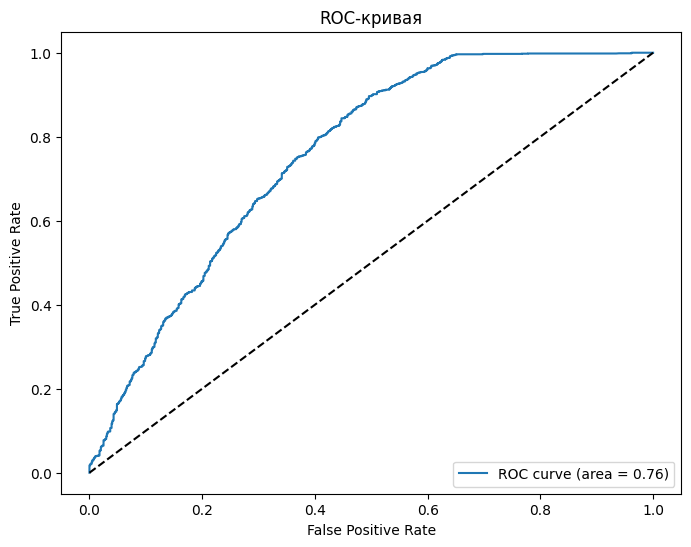

In [122]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()